# "Importing the pandas Library"

In [3]:
import pandas as pd

# "Reading a CSV File into a DataFrame"

In [4]:
df = pd.read_csv('MSFT.csv')

# "DataFrame Overview"

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...,...
9391,2023-06-16,351.320007,351.470001,341.950012,342.329987,342.329987,46533600
9392,2023-06-20,339.309998,342.079987,335.859985,338.049988,338.049988,26375400
9393,2023-06-21,336.369995,337.730011,332.070007,333.559998,333.559998,25117800
9394,2023-06-22,334.119995,340.119995,333.339996,339.709991,339.709991,23556800


# "Selecting Columns 'Date' and 'Close' from DataFrame"

In [6]:
df = df[['Date','Close']]

# "DataFrame Overview"

In [7]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9391,2023-06-16,342.329987
9392,2023-06-20,338.049988
9393,2023-06-21,333.559998
9394,2023-06-22,339.709991


# "Accessing the 'Date' Column in DataFrame"

In [8]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9391    2023-06-16
9392    2023-06-20
9393    2023-06-21
9394    2023-06-22
9395    2023-06-23
Name: Date, Length: 9396, dtype: object

# "Defining a Function to Convert String to DateTime and Creating a DateTime Object"

In [9]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

# "DataFrame Overview"

In [10]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9391,2023-06-16,342.329987
9392,2023-06-20,338.049988
9393,2023-06-21,333.559998
9394,2023-06-22,339.709991


# "Converting 'Date' Column to DateTime Format and Updating DataFrame"

In [11]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\91915\AppData\Local\Temp\ipykernel_22716\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9391   2023-06-16
9392   2023-06-20
9393   2023-06-21
9394   2023-06-22
9395   2023-06-23
Name: Date, Length: 9396, dtype: datetime64[ns]

# "Setting 'Date' Column as DataFrame Index"

In [12]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-06-16,342.329987
2023-06-20,338.049988
2023-06-21,333.559998


# "Plotting 'Close' Values over Time"

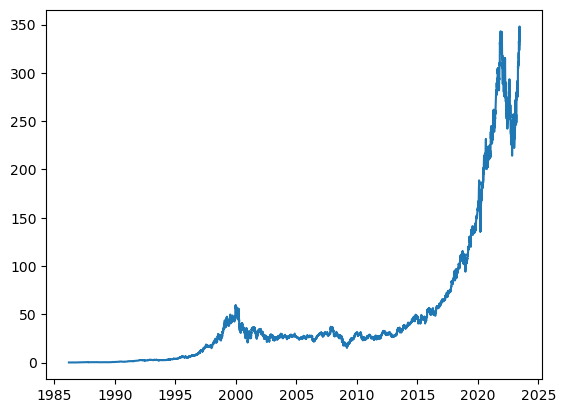

In [13]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

# "Creating a Windowed DataFrame with Historical Close Prices and Target Close Prices"

In [15]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


# "Converting Windowed DataFrame to Dates, Input (X), and Target (y) Arrays"

In [16]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

# "Splitting Data into Train, Validation, and Test Sets and Plotting Close Prices"

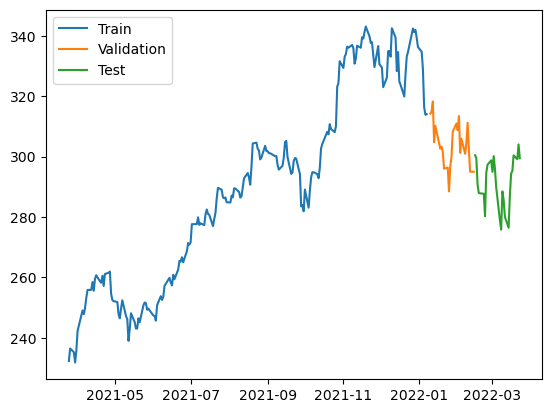

In [17]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

# "Creating and Training an LSTM Model for Time Series Prediction"

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 100ms/step - loss: 84291.1328 - mean_absolute_error: 288.5854 - val_loss: 91893.3125 - val_mean_absolute_error: 303.0517
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 83955.9219 - mean_absolute_error: 288.0021 - val_loss: 91567.5234 - val_mean_absolute_error: 302.5137
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 83639.5156 - mean_absolute_error: 287.4520 - val_loss: 91207.5703 - val_mean_absolute_error: 301.9182
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 83255.7188 - mean_absolute_error: 286.7832 - val_loss: 90708.7500 - val_mean_absolute_error: 301.0909
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 82671.2812 - mean_absolute_error: 285.7650 - val_loss: 89973.2500 - val_mean_absolute_error: 299.8671
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 81941.5391 - mean_absolute_error: 284.4812 - val_loss: 89091.9

Epoch 49/100
7/7 [==============================] - 0s 8ms/step - loss: 959.6304 - mean_absolute_error: 26.1982 - val_loss: 348.0758 - val_mean_absolute_error: 17.2614
Epoch 50/100
7/7 [==============================] - 0s 9ms/step - loss: 913.4398 - mean_absolute_error: 25.5650 - val_loss: 366.8013 - val_mean_absolute_error: 17.8236
Epoch 51/100
7/7 [==============================] - 0s 7ms/step - loss: 887.1578 - mean_absolute_error: 25.1415 - val_loss: 266.7779 - val_mean_absolute_error: 14.7997
Epoch 52/100
7/7 [==============================] - 0s 8ms/step - loss: 856.1506 - mean_absolute_error: 24.7708 - val_loss: 566.1543 - val_mean_absolute_error: 22.8103
Epoch 53/100
7/7 [==============================] - 0s 7ms/step - loss: 799.8412 - mean_absolute_error: 23.7772 - val_loss: 158.3256 - val_mean_absolute_error: 10.8638
Epoch 54/100
7/7 [==============================] - 0s 7ms/step - loss: 817.4014 - mean_absolute_error: 24.1223 - val_loss: 382.0612 - val_mean_absolute_error: 

# "Plotting Training Predictions vs. Training Observations"

7/7 [==============================] - 0s 2ms/step


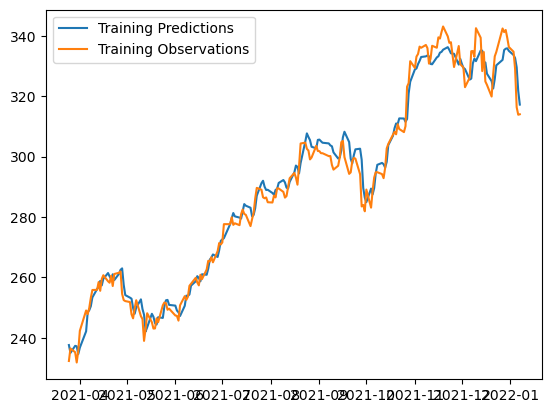

In [19]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

# "Plotting Validation Predictions vs. Validation Observations"

1/1 [==============================] - 0s 28ms/step


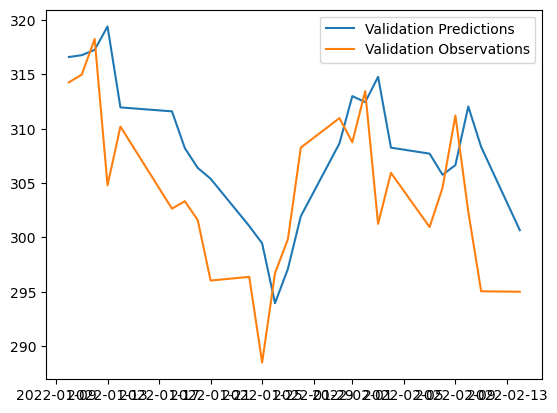

In [20]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

# "Plotting Testing Predictions vs. Testing Observations"

1/1 [==============================] - 0s 19ms/step


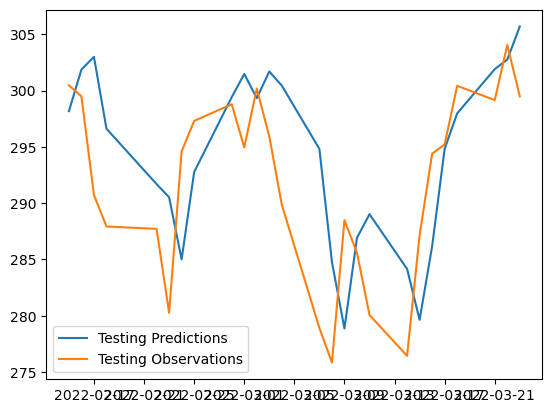

In [21]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

# "Plotting Predictions and Observations for Training, Validation, and Testing Data"

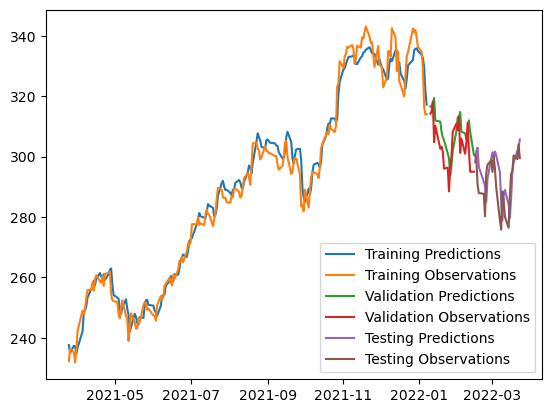

In [22]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

# "Generating Recursive Predictions for Validation and Testing Data"

In [23]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 18ms/step


# "Plotting Predictions and Observations for Training, Validation, Testing, and Recursive Data"

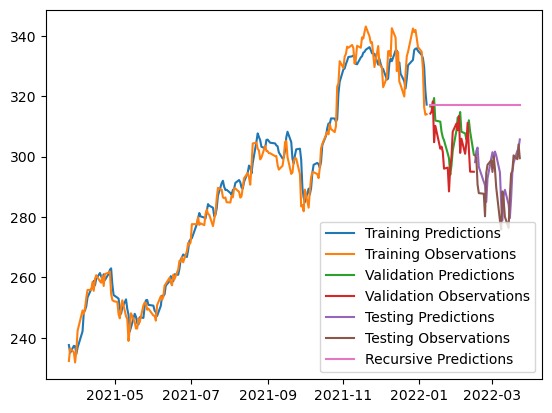

In [24]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])